In [2]:
import nbimporter
import tarefa1
import numpy as np
from matplotlib import pyplot as plt
import math
from pyerf import pyerf
import scipy
import time
import random
import scipy.stats as stats

Interpolation 

In [2]:
#gaussian
def gaussian(mu,sigma,x):
    fx = 1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(x-mu)**2/(2*sigma**2))
    return fx

x_bins = np.linspace(-5,5,1000)
pairs_gauss = []
for i in range(len(x_bins)):
    pairs_gauss.append([x_bins[i],gaussian(0,1,x_bins[i])])

gauss_interpol = tarefa1.lin_interpol(pairs_gauss)


# gauss_erf
def gauss_erf(mu,sigma,x):
    fx = (gaussian(mu,sigma,x)-gaussian(-mu,sigma,x)/scipy.special.erf(mu/(np.sqrt(2)*sigma)))
    return fx


x_bins = np.linspace(0,10,1000)
pairs_gausserf = []
for i in range(len(x_bins)):
    pairs_gausserf.append([x_bins[i],gaussian(4,1,x_bins[i])])

gausserf_interpol = tarefa1.lin_interpol(pairs_gausserf)


Questão 1

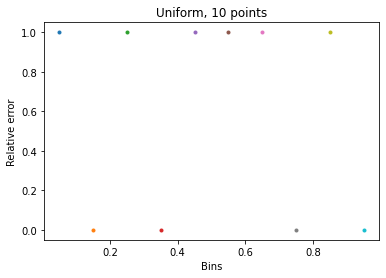

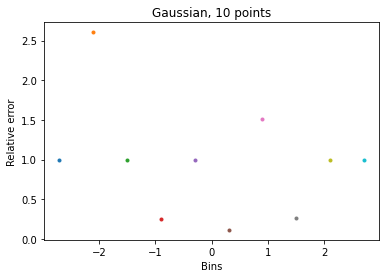

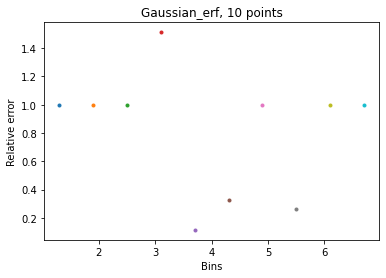

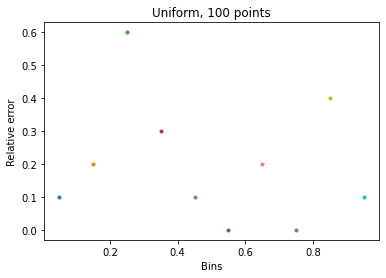

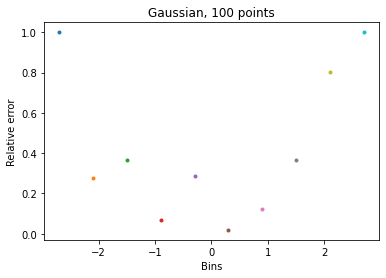

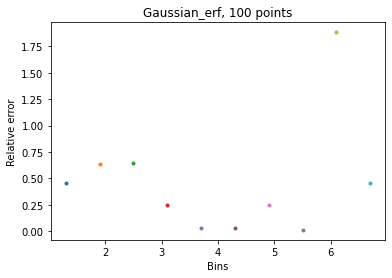

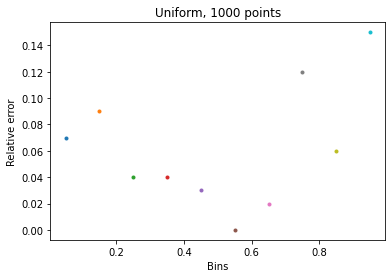

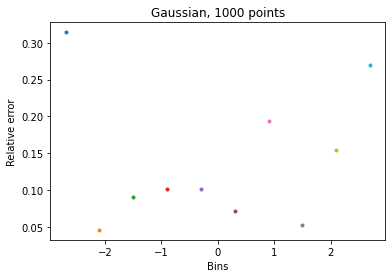

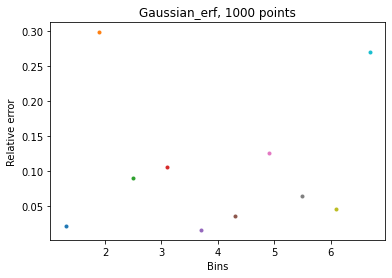

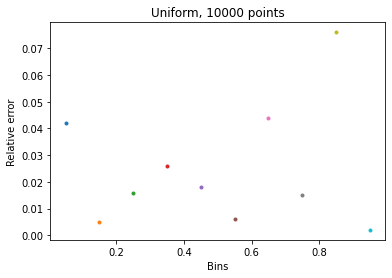

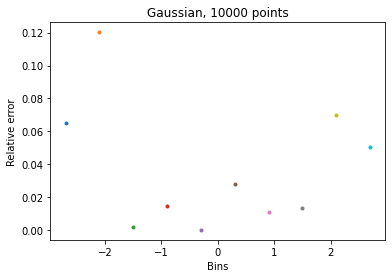

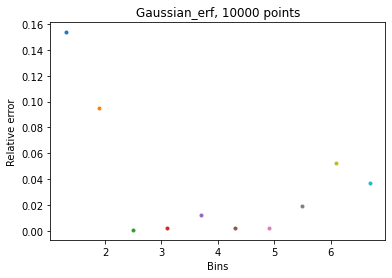

In [14]:
N_size = [10,100,1000,10000]
bins = 10




for N in N_size:
#letra a
    
    #uniform
    uniform_sample = np.random.uniform(0,1,N)
    
    #gaussian
    sampler_gaussiano = tarefa1.sampler(pairs_gauss)
    gaussian_sample = sampler_gaussiano.sample(N)
    
    #gaussian_erf
    sampler_gausserf = tarefa1.sampler(pairs_gausserf)
    gaussianerf_sample = sampler_gausserf.sample(N)

#letra b
    
    #uniform
    binned_uniform = np.histogram(uniform_sample, bins, range = (0,1))
    n_uniform = []
    for i in range(len(binned_uniform[1])-1):
        n_uniform.append((binned_uniform[1][i+1]-binned_uniform[1][i])*N)
    
    n_uniform_error = abs(binned_uniform[0]-n_uniform)/n_uniform
    
    
    #gaussian
    binned_gaussian = np.histogram(gaussian_sample, bins, range = (-3,3))
    n_gaussian = []
    for i in range(len(binned_gaussian[1])-1):
        n_gaussian.append(N*gauss_interpol.integral(binned_gaussian[1][i],binned_gaussian[1][i+1]))
    
    n_gaussian_error = abs(binned_gaussian[0]-n_gaussian)/n_gaussian
    
    
    #gaussian_erf
    binned_gaussianerf = np.histogram(gaussianerf_sample, bins, range = (1,7))
    n_gaussianerf = []
    for i in range(len(binned_gaussianerf[1])-1):
        n_gaussianerf.append(N*gausserf_interpol.integral(binned_gaussianerf[1][i],binned_gaussianerf[1][i+1]))
    
    n_gaussianerf_error = abs(binned_gaussianerf[0]-n_gaussianerf)/n_gaussianerf
    
    
#letra c
    
    #uniform
    for i in range(len(binned_uniform[1])-1):
        plt.plot((binned_uniform[1][i+1]+binned_uniform[1][i])/2, n_uniform_error[i],'.')
    plt.xlabel('Bins')
    plt.ylabel('Relative error')
    plt.title('Uniform, '+ str(N) + ' points')
    plt.show()
    
    
    #gaussian
    for i in range(len(binned_gaussian[1])-1):
        plt.plot((binned_gaussian[1][i+1]+binned_gaussian[1][i])/2, n_gaussian_error[i],'.')
    plt.xlabel('Bins')
    plt.ylabel('Relative error')
    plt.title('Gaussian, '+ str(N) + ' points')
    plt.show()
    
    #gaussian_erf
    for i in range(len(binned_gaussianerf[1])-1):
        plt.plot((binned_gaussianerf[1][i+1]+binned_gaussianerf[1][i])/2, n_gaussianerf_error[i],'.')
    plt.xlabel('Bins')
    plt.ylabel('Relative error')
    plt.title('Gaussian_erf, '+ str(N) + ' points')
    plt.show()

    

Questão 2

Mean_mean = 0.011612705042571031
Variance_mean = 1.0030297489036308


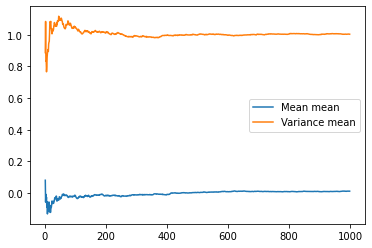

In [6]:
gaussian_sample = []
mean_mean = []
variance_mean = []
mean = []
variance = []
t_list = []
for t in range(1,1000):
    gaussian_sample = []
    for N in range(0,11):
        gaussian_sample.append(random.gauss(0,1))
    
    
    mean.append(np.sum(gaussian_sample)/N)
    variance.append(np.sum((mean[t-1] - gaussian_sample)**2)/N)
    
    mean_mean.append(np.sum(mean)/t)
    variance_mean.append(np.sum(variance)/t)
    t_list.append(t)

    

plt.plot(t_list,mean_mean, label = 'Mean mean')
plt.plot(t_list,variance_mean, label = 'Variance mean')
plt.legend()
print('Mean_mean = ' + str(mean_mean[-1]))
print('Variance_mean = ' +  str(variance_mean[-1]))

Questão 3

In [7]:
N_size = [10,100,1000,10000,100000]
skew = []
curtosis = []
sampler_gausserf = tarefa1.sampler(pairs_gausserf)

for N in N_size:
    gaussianerf_sample = sampler_gausserf.sample(N)
    mean = np.sum(gaussianerf_sample)/N
    std = np.sqrt((np.sum((mean - gaussianerf_sample)**2)/N))
    
    skew.append(np.sum((gaussianerf_sample - mean)**3)/(N*std**3))
    curtosis.append(np.sum((gaussianerf_sample - mean)**4)/(N*std**4)-3)
    

for i in range(len(skew)):
    if abs(skew[i]) < 0.01:
        print('skew stabilized in N = ' + str(N_size[i]))
        print(skew[i])
        break
    if i == len(skew)-1:
        print("Skew hasn't stabilized yet.")
        print(skew[i])
    

for i in range(len(curtosis)):
    if abs(curtosis[i]) < 0.01:
        print('curtosis stabilized in N = ' + str(N_size[i]))
        print(curtosis[i])
        break
    if i == len(curtosis)-1:
        print("Curtosis hasn't stabilized yet.")
        print(curtosis[i])

Skew hasn't stabilized yet.
0.01607139285999757
Curtosis hasn't stabilized yet.
-0.012926170415946903


Questão 4

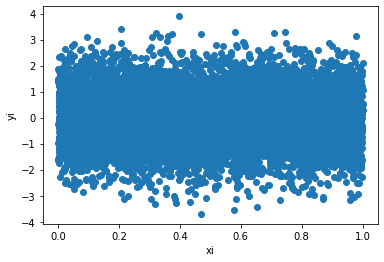

Corr(xi,yi) = -0.01821523939329417


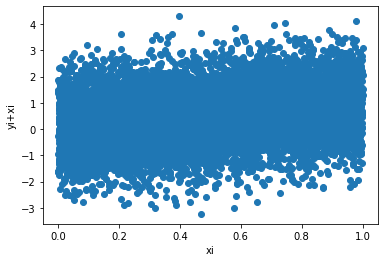

Corr(xi,yi+xi) = 0.2612473222973975


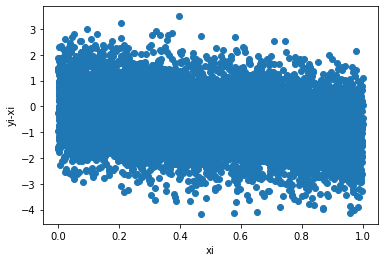

Corr(xi,yi-xi) = -0.29355361103895755


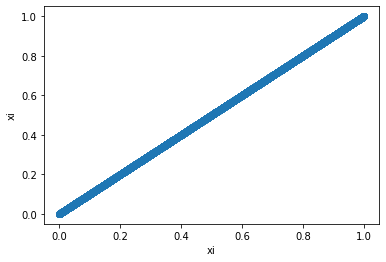

In [8]:
sampler_gausserf = tarefa1.sampler(pairs_gausserf)
N_size = np.linspace(10,10000,10,dtype = int)
cov_a = []
corr_a = []
cov_plus = []
corr_plus = []
cov_minus = []
corr_minus = []


for N in N_size:
#letra a 
    uniform_sample = np.random.uniform(0,1,N)
    uniform_mean = np.sum(uniform_sample)/N
    uniform_std = np.sqrt((np.sum((uniform_mean - uniform_sample)**2)/N))
    
    gaussian_sample = sampler_gaussiano.sample(N)
    gaussian_mean = np.sum(gaussian_sample)/N
    gaussian_std = np.sqrt((np.sum((gaussian_sample - gaussian_mean)**2)/N))
    
    cov_a.append(np.sum((uniform_sample-uniform_mean)*(gaussian_sample-gaussian_mean))/N)
    corr_a.append((np.sum((uniform_sample-uniform_mean)*(gaussian_sample-gaussian_mean))/N)/(uniform_std*gaussian_std))

#letra b
    gaussian_plus_sample = gaussian_sample+uniform_sample
    gaussian_plus_mean = np.sum(gaussian_plus_sample)/N
    gaussian_plus_std = np.sqrt((np.sum((gaussian_plus_sample - gaussian_plus_mean)**2)/N))
    
    cov_plus.append(np.sum((uniform_sample-uniform_mean)*(gaussian_plus_sample-gaussian_plus_mean))/N)
    corr_plus.append((np.sum((uniform_sample-uniform_mean)*(gaussian_plus_sample-gaussian_plus_mean))/N)/(uniform_std*gaussian_plus_std))
    
    
    gaussian_minus_sample = gaussian_sample - uniform_sample
    gaussian_minus_mean = np.sum(gaussian_minus_sample)/N
    gaussian_minus_std = np.sqrt((np.sum((gaussian_minus_sample - gaussian_minus_mean)**2)/N))
    
    cov_minus.append(np.sum((uniform_sample-uniform_mean)*(gaussian_minus_sample-gaussian_minus_mean))/N)
    corr_minus.append((np.sum((uniform_sample-uniform_mean)*(gaussian_minus_sample-gaussian_minus_mean))/N)/(uniform_std*gaussian_minus_std))
 


#letra c
plt.scatter(uniform_sample,gaussian_sample)
plt.ylabel('yi')
plt.xlabel('xi')
plt.show()
print('Corr(xi,yi) = ' +str(corr_a[-1]))

plt.scatter(uniform_sample,gaussian_plus_sample)
plt.ylabel('yi+xi')
plt.xlabel('xi')
plt.show()
print('Corr(xi,yi+xi) = ' +str(corr_plus[-1]))

plt.scatter(uniform_sample,gaussian_minus_sample)
plt.ylabel('yi-xi')
plt.xlabel('xi')
plt.show()
print('Corr(xi,yi-xi) = ' +str(corr_minus[-1]))

plt.scatter(uniform_sample,uniform_sample)
plt.ylabel('xi')
plt.xlabel('xi')
plt.show()

Questão 5

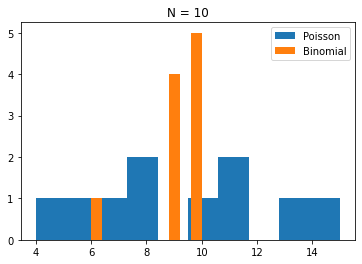

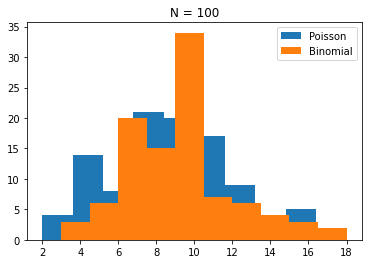

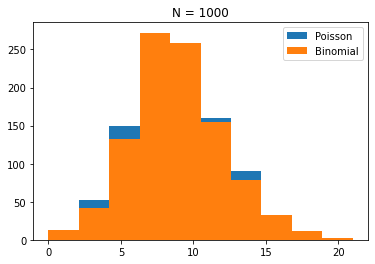

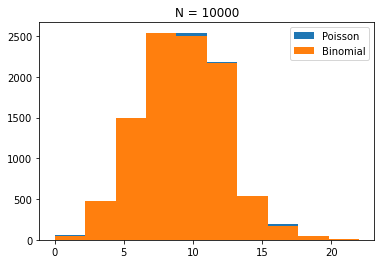

In [9]:
def binomial_sample(n):
    success = 0
    lamb = 9
    p = lamb/n
    uniform_sample = np.random.uniform(0,1,n)
    for toss in uniform_sample:
        if toss <= p:
            success +=1
    return success

N_size = [10,100,1000,10000]
for N in N_size:
    binomial = []
    for i in range(0,N):
        binomial.append(binomial_sample(N))
    
    poisson_sample = np.random.poisson(9,N)
    plt.hist(poisson_sample,label = 'Poisson')
    plt.hist(binomial, label = 'Binomial')
    plt.title('N = '+str(N))
    plt.legend()
    plt.show()

Questão 6

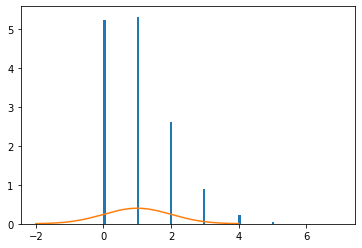

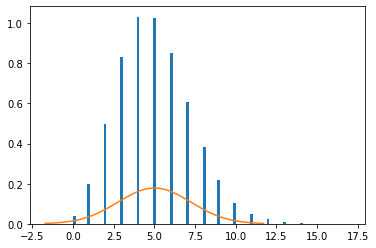

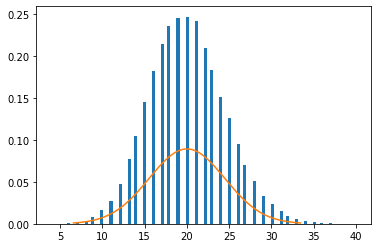

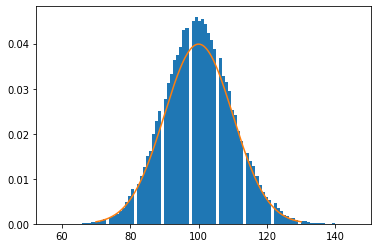

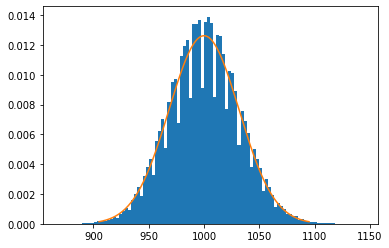

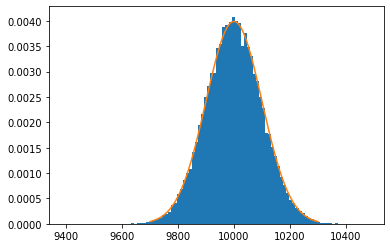

In [10]:
lamb_list = [1,5,20,100,1000,10000]
for lamb in lamb_list:
    poisson_sample = np.random.poisson(lamb,100000)
    x_list = np.linspace(lamb-3*np.sqrt(lamb),lamb+3*np.sqrt(lamb),1000)
    gaussianpdf = [gaussian(lamb,np.sqrt(lamb),x) for x in x_list]
    plt.hist(poisson_sample,density = True,bins = 100)
    plt.plot(x_list,gaussianpdf)
    plt.show()

Questão 7

$P(n \sigma) = \int_{\Omega_n}P(x,y)dxdy$

$P(x,y) = \frac{e^{-\frac{1}{2} \left ( \frac{x-\mu_x}{\sigma_x}  \right )^2 - \frac{1}{2} \left ( \frac{y-\mu_y}{\sigma_y}  \right )^2}}{2\pi \sigma_x \sigma_y} $

making the transformation 

$x' =  \left (\frac{x-\mu_x}{\sigma_x}  \right) , y' = \left (\frac{y-\mu_y}{\sigma_y}  \right)$ we got

$P(n \sigma) = \frac{1}{2\pi}\int_{\Omega_n}e^{-\frac{x'^2+y'^2}{2}}dx'dy'$

now going to polar cordinates we got

$P(n \sigma) =\frac{1}{2\pi} \int_{0}^{\chi} \int_{0}^{2\pi} e^{-\frac{r^2}{2}}r d\theta dr = 1 - e^{-\frac{\chi^2}{2}} $


In [11]:
for chi in range(1,10):
    print("n = "+ str(chi) + ' então P(n*sigma) = '+ str(1-np.exp(-chi**2/2)))

n = 1 então P(n*sigma) = 0.3934693402873666
n = 2 então P(n*sigma) = 0.8646647167633873
n = 3 então P(n*sigma) = 0.9888910034617577
n = 4 então P(n*sigma) = 0.9996645373720975
n = 5 então P(n*sigma) = 0.999996273346828
n = 6 então P(n*sigma) = 0.9999999847700203
n = 7 então P(n*sigma) = 0.9999999999771026
n = 8 então P(n*sigma) = 0.9999999999999873
n = 9 então P(n*sigma) = 1.0


Questão 8

Repeating the procedure above for the new distribution we get


$P(n \sigma) =\frac{1}{2\pi} \int_{0}^{\chi} \int_{0}^{2\pi} e^{-\frac{r^2}{2}}r d\theta dr = 1 - e^{-\frac{\chi^2}{2(1-\rho^2)}} $

In [12]:
rho = 0.5
for chi in range(1,10):
    print("n = "+ str(chi) + ' então P(n*sigma) = '+ str(1-(np.exp(-chi**2/2/(1-rho**2)))))

n = 1 então P(n*sigma) = 0.486582880967408
n = 2 então P(n*sigma) = 0.9305165487771985
n = 3 então P(n*sigma) = 0.9975212478233336
n = 4 então P(n*sigma) = 0.9999766908988571
n = 5 então P(n*sigma) = 0.9999999422225148
n = 6 então P(n*sigma) = 0.9999999999622486
n = 7 então P(n*sigma) = 0.9999999999999934
n = 8 então P(n*sigma) = 1.0
n = 9 então P(n*sigma) = 1.0


Questão 9

In [6]:
#letra a

#uniform
uniform_sample = [np.random.uniform(0,1) for i in range(0,1001)]
uniform_estimators = tarefa1.mean_estimators(uniform_sample)

print('Uniform case')
print('real mean = ' + str(0.5))
print('arithimetic mean = ' + str(uniform_estimators.arithimetic()))
print('10 first = ' + str(uniform_estimators.ten_first()))
print('arithimetic -1 = ' + str(uniform_estimators.arithimetic_1()))
print('1.8 = ' + str(uniform_estimators.one_eight()))
print('geometric = ' + str(uniform_estimators.geometric()))
print('mode = ' + str(uniform_estimators.mode()))
print('max_min_2 = ' + str(uniform_estimators.max_min_mean()))
print('only even = '+ str(uniform_estimators.only_even()))


#gaussian
sampler_gaussiano = tarefa1.sampler(pairs_gauss)
gaussian_sample = sampler_gaussiano.sample(1000)
gaussian_estimators = tarefa1.mean_estimators(gaussian_sample)

print('\n Gaussian case')
print('real mean = ' + str(0))
print('arithimetic mean = ' + str(gaussian_estimators.arithimetic()))
print('10 first = ' + str(gaussian_estimators.ten_first()))
print('arithimetic -1 = ' + str(gaussian_estimators.arithimetic_1()))
print('1.8 = ' + str(gaussian_estimators.one_eight()))
print('geometric = ' + str(gaussian_estimators.geometric()))
print('mode = ' + str(gaussian_estimators.mode()))
print('max_min_2 = ' + str(gaussian_estimators.max_min_mean()))
print('only even = '+ str(gaussian_estimators.only_even()))
    
#gaussian_erf
sampler_gausserf = tarefa1.sampler(pairs_gausserf)
gaussianerf_sample = sampler_gausserf.sample(100)
gaussianerf_estimators = tarefa1.mean_estimators(gaussianerf_sample)

print('\n Gaussian_erf case')
print('real mean = ' + str(4))
print('arithimetic mean = ' + str(gaussianerf_estimators.arithimetic()))
print('10 first = ' + str(gaussianerf_estimators.ten_first()))
print('arithimetic -1 = ' + str(gaussianerf_estimators.arithimetic_1()))
print('1.8 = ' + str(gaussianerf_estimators.one_eight()))
print('geometric = ' + str(gaussianerf_estimators.geometric()))
print('mode = ' + str(gaussianerf_estimators.mode()))
print('max_min_2 = ' + str(gaussianerf_estimators.max_min_mean()))
print('only even = '+ str(gaussianerf_estimators.only_even()))
    

Uniform case
real mean = 0.5
arithimetic mean = 0.5072671928910253
10 first = 0.4989502029276883
arithimetic -1 = 0.5077744600839162
1.8 = 1.8
geometric = 0.0
mode = 0.049876644203182274
max_min_2 = 0.49917307631199276
only even = 0.5089902921452256

 Gaussian case
real mean = 0
arithimetic mean = 0.0321330128044877
10 first = -0.5814038614918084
arithimetic -1 = 0.03216517798247017
1.8 = 1.8
geometric = 0.5524799749664044
mode = -1.22394232765282
max_min_2 = -0.031245621389341727
only even = 0.03305446419836839

 Gaussian_erf case
real mean = 4
arithimetic mean = 3.901571025165154
10 first = 4.958320595428276
arithimetic -1 = 3.9409808335001557
1.8 = 1.8
geometric = 3.6962731882348634
mode = 4.087526230034882
max_min_2 = 3.6163297892458868
only even = 3.8492955081854374


In [16]:
#letra b

print('Consistency test for 100000 points in the sample. \n')
#consitency

#uniform sample
uniform_sample = [np.random.uniform(0,1) for i in range(0,100000)]
uniform_estimators = tarefa1.mean_estimators(uniform_sample)

print('Uniform case')
print('real mean = ' + str(0.5))
print('arithimetic mean consistency =  ' + str(abs(uniform_estimators.arithimetic()-0.5)))
print('10 first = ' + str(abs(uniform_estimators.ten_first()-0.5)))
print('arithimetic -1 = ' + str(abs(uniform_estimators.arithimetic_1()-0.5)))
print('1.8 = ' + str(abs(uniform_estimators.one_eight()-0.5)))
print('geometric = ' + str(abs(uniform_estimators.geometric())-0.5))
print('mode = ' + str(abs(uniform_estimators.mode())-0.5))
print('max_min_2 = ' + str(abs(uniform_estimators.max_min_mean()-0.5)))
print('only even = '+ str(abs(uniform_estimators.only_even()-0.5)))

#gaussian sample
sampler_gaussiano = tarefa1.sampler(pairs_gauss)
gaussian_sample = sampler_gaussiano.sample(100000)
gaussian_estimators = tarefa1.mean_estimators(gaussian_sample)

print('\n Gaussian case')
print('real mean = ' + str(0))
print('arithimetic mean consistency =  ' + str(abs(gaussian_estimators.arithimetic()-0)))
print('10 first = ' + str(abs(gaussian_estimators.ten_first()-0)))
print('arithimetic -1 = ' + str(abs(gaussian_estimators.arithimetic_1()-0)))
print('1.8 = ' + str(abs(gaussian_estimators.one_eight()-0)))
print('geometric = ' + str(abs(gaussian_estimators.geometric()-0)))
print('mode = ' + str(abs(gaussian_estimators.mode()-0)))
print('max_min_2 = ' + str(abs(gaussian_estimators.max_min_mean()-0)))
print('only even = '+ str(abs(gaussian_estimators.only_even()-0)))


#gaussian_erf sample
sampler_gausserf = tarefa1.sampler(pairs_gausserf)
gaussianerf_sample = sampler_gausserf.sample(100000)
gaussianerf_estimators = tarefa1.mean_estimators(gaussianerf_sample)

print('\n Gaussian_erf case')
print('real mean = ' + str(0))
print('arithimetic mean consistency =  ' + str(abs(gaussianerf_estimators.arithimetic()-4)))
print('10 first = ' + str(abs(gaussianerf_estimators.ten_first()-4)))
print('arithimetic -1 = ' + str(abs(gaussianerf_estimators.arithimetic_1()-4)))
print('1.8 = ' + str(abs(gaussianerf_estimators.one_eight()-4)))
print('geometric = ' + str(abs(gaussianerf_estimators.geometric()-4)))
print('mode = ' + str(abs(gaussianerf_estimators.mode()-4)))
print('max_min_2 = ' + str(abs(gaussianerf_estimators.max_min_mean()-4)))
print('only even = '+ str(abs(gaussianerf_estimators.only_even()-4)))



    

Consistency test for 100000 points in the sample. 

Uniform case
real mean = 0.5
arithimetic mean consistency =  0.0013380417429293967
10 first = 0.10124631630791775
arithimetic -1 = 0.0013430551734811003
1.8 = 1.3
geometric = -0.5
mode = -0.07696067063688206
max_min_2 = 5.697920357761177e-09
only even = 0.001055931472634275

 Gaussian case
real mean = 0
arithimetic mean consistency =  0.1471320257344422
10 first = 0.5711454938054951
arithimetic -1 = 0.14861820781256788
1.8 = 1.8
geometric = nan
mode = 0.7768224935745622
max_min_2 = 0.22339856980956685
only even = 0.002605373994847331

 Gaussian_erf case
real mean = 0
arithimetic mean consistency =  0.06614215831925918
10 first = 0.5274400140860962
arithimetic -1 = 0.10721430133258458
1.8 = 2.2
geometric = 0.0540375945691145
mode = 0.5649836214800459
max_min_2 = 0.4931918119167644
only even = 0.25418373658639926

 Bias test for the estimators. 
 


In [23]:
#bias
print('Bias test for the estimators for size 20 sample with 10 realizations. \n ')

#uniform sample
arithimetic_mean_list = []
ten_first_list = []
arithimetic_1_list = []
one_eight_list = []
geometric_list = []
mode_list = []
max_min_2_list = []
only_even_list = []

for trow in range(0,100):

    uniform_sample = [np.random.uniform(0,1) for i in range(0,20)]
    uniform_estimators = tarefa1.mean_estimators(uniform_sample)
    
    arithimetic_mean_list.append(uniform_estimators.arithimetic())
    ten_first_list.append(uniform_estimators.ten_first())
    arithimetic_1_list.append(uniform_estimators.arithimetic_1())
    one_eight_list.append(uniform_estimators.one_eight())
    geometric_list.append(uniform_estimators.geometric())
    mode_list.append(uniform_estimators.mode())
    max_min_2_list.append(uniform_estimators.max_min_mean())
    only_even_list.append(uniform_estimators.only_even())

    
    
print('Uniform case')
print('real mean = ' + str(0.5))
print('arithimetic mean =  ' + str(abs(np.sum(arithimetic_mean_list)/100-0.5)))
print('10 first = ' + str(abs(np.sum(ten_first_list)/100-0.5)))
print('arithimetic -1 = ' + str(abs(np.sum(arithimetic_1_list)/100-0.5)))
print('1.8 = ' + str(abs(np.sum(one_eight_list)/100-0.5)))
print('geometric = ' + str(abs(np.sum(geometric_list)/100)-0.5))
print('mode = ' + str(abs(np.sum(mode_list)/100)-0.5))
print('max_min_2 = ' + str(abs(np.sum(max_min_2_list)/100-0.5)))
print('only even = '+ str(abs(np.sum(only_even_list)/100-0.5)))




#gaussian sample
arithimetic_mean_list = []
ten_first_list = []
arithimetic_1_list = []
one_eight_list = []
geometric_list = []
mode_list = []
max_min_2_list = []
only_even_list = []

for trow in range(0,100):

    sampler_gaussiano = tarefa1.sampler(pairs_gauss)
    gaussian_sample = sampler_gaussiano.sample(20)
    gaussian_estimators = tarefa1.mean_estimators(gaussian_sample)
    
    arithimetic_mean_list.append(gaussian_estimators.arithimetic())
    ten_first_list.append(gaussian_estimators.ten_first())
    arithimetic_1_list.append(gaussian_estimators.arithimetic_1())
    one_eight_list.append(gaussian_estimators.one_eight())
    geometric_list.append(gaussian_estimators.geometric())
    mode_list.append(gaussian_estimators.mode())
    max_min_2_list.append(gaussian_estimators.max_min_mean())
    only_even_list.append(gaussian_estimators.only_even())

    
    
print('\n Gaussian case')
print('real mean = ' + str(0))
print('arithimetic mean =  ' + str(abs(np.sum(arithimetic_mean_list)/100-0)))
print('10 first = ' + str(abs(np.sum(ten_first_list)/100-0)))
print('arithimetic -1 = ' + str(abs(np.sum(arithimetic_1_list)/100-0)))
print('1.8 = ' + str(abs(np.sum(one_eight_list)/100-0)))
print('geometric = ' + str(abs(np.sum(geometric_list)/100)-0))
print('mode = ' + str(abs(np.sum(mode_list)/100)-0))
print('max_min_2 = ' + str(abs(np.sum(max_min_2_list)/100-0)))
print('only even = '+ str(abs(np.sum(only_even_list)/100-0)))


#gaussian_erf sample
arithimetic_mean_list = []
ten_first_list = []
arithimetic_1_list = []
one_eight_list = []
geometric_list = []
mode_list = []
max_min_2_list = []
only_even_list = []

for trow in range(0,100):

    sampler_gausserf = tarefa1.sampler(pairs_gausserf)
    gaussianerf_sample = sampler_gausserf.sample(20)
    gaussianerf_estimators = tarefa1.mean_estimators(gaussianerf_sample)
    
    arithimetic_mean_list.append(gaussianerf_estimators.arithimetic())
    ten_first_list.append(gaussianerf_estimators.ten_first())
    arithimetic_1_list.append(gaussianerf_estimators.arithimetic_1())
    one_eight_list.append(gaussianerf_estimators.one_eight())
    geometric_list.append(gaussianerf_estimators.geometric())
    mode_list.append(gaussianerf_estimators.mode())
    max_min_2_list.append(gaussianerf_estimators.max_min_mean())
    only_even_list.append(gaussianerf_estimators.only_even())

    
    
print('\n Gaussian erf case')
print('real mean = ' + str(4))
print('arithimetic mean =  ' + str(abs(np.sum(arithimetic_mean_list)/100-4)))
print('10 first = ' + str(abs(np.sum(ten_first_list)/100-4)))
print('arithimetic -1 = ' + str(abs(np.sum(arithimetic_1_list)/100-4)))
print('1.8 = ' + str(abs(np.sum(one_eight_list)/100-4)))
print('geometric = ' + str(abs(np.sum(geometric_list)/100)-4))
print('mode = ' + str(abs(np.sum(mode_list)/100)-4))
print('max_min_2 = ' + str(abs(np.sum(max_min_2_list)/100-4)))
print('only even = '+ str(abs(np.sum(only_even_list)/100-4)))



Bias test for the estimators for size 20 sample with 10 realizations. 
 
Uniform case
real mean = 0.5
arithimetic mean =  0.0333295630725059
10 first = 0.07492276018341892
arithimetic -1 = 0.06139954007632198
1.8 = 1.48
geometric = -0.10545711797115376
mode = -0.01522199652509465
max_min_2 = 0.04706582251232638
only even = 0.021297215261795843

 Gaussian case
real mean = 0
arithimetic mean =  0.053396902510757474
10 first = 0.089910519746742
arithimetic -1 = 0.056207265800797344
1.8 = 1.98
geometric = nan
mode = 0.2793368083400198
max_min_2 = 0.018272844130105537
only even = 0.06310179331507319

 Gaussian erf case
real mean = 4
arithimetic mean =  0.41791602080699697
10 first = 0.8805882065530612
arithimetic -1 = 0.6504379166389453
1.8 = 2.02
geometric = 0.2622929561720557
mode = 0.8354412967833884
max_min_2 = 0.4995568799706067
only even = 0.37572900051771185


In [4]:
#efficiency
print('Efficiency test for the estimators for size 20 sample with 10 realizations. \n ')

#uniform sample
arithimetic_mean_list = []
ten_first_list = []
arithimetic_1_list = []
one_eight_list = []
geometric_list = []
mode_list = []
max_min_2_list = []
only_even_list = []

for trow in range(0,10):

    uniform_sample = [np.random.uniform(0,1) for i in range(0,20)]
    uniform_estimators = tarefa1.mean_estimators(uniform_sample)
    
    arithimetic_mean_list.append(uniform_estimators.arithimetic())
    ten_first_list.append(uniform_estimators.ten_first())
    arithimetic_1_list.append(uniform_estimators.arithimetic_1())
    one_eight_list.append(uniform_estimators.one_eight())
    geometric_list.append(uniform_estimators.geometric())
    mode_list.append(uniform_estimators.mode())
    max_min_2_list.append(uniform_estimators.max_min_mean())
    only_even_list.append(uniform_estimators.only_even())

    
    
print('Uniform case')
print('real mean = ' + str(0.5))
print('arithimetic mean =  ' + str(np.sum((arithimetic_mean_list-np.sum(arithimetic_mean_list)/10)**2)/10))
print('10 first = ' + str(np.sum((ten_first_list-np.sum(ten_first_list)/10)**2)/10))
print('arithimetic -1 = ' + str(np.sum((arithimetic_1_list-np.sum(arithimetic_1_list)/10)**2)/10))
print('1.8 = ' + str(np.sum((one_eight_list-np.sum(one_eight_list)/10)**2)/10))
print('geometric = ' + str(np.sum((geometric_list-np.sum(geometric_list)/10)**2)/10))
print('mode = ' + str(np.sum((mode_list-np.sum(mode_list)/10)**2)/10))
print('max_min_2 = ' + str(np.sum((max_min_2_list-np.sum(max_min_2_list)/10)**2)/10))
print('only even = '+ str(np.sum((only_even_list-np.sum(only_even_list)/10)**2)/10))




#gaussian sample
arithimetic_mean_list = []
ten_first_list = []
arithimetic_1_list = []
one_eight_list = []
geometric_list = []
mode_list = []
max_min_2_list = []
only_even_list = []

for trow in range(0,10):

    sampler_gaussiano = tarefa1.sampler(pairs_gauss)
    gaussian_sample = sampler_gaussiano.sample(20)
    gaussian_estimators = tarefa1.mean_estimators(gaussian_sample)
    
    arithimetic_mean_list.append(gaussian_estimators.arithimetic())
    ten_first_list.append(gaussian_estimators.ten_first())
    arithimetic_1_list.append(gaussian_estimators.arithimetic_1())
    one_eight_list.append(gaussian_estimators.one_eight())
    geometric_list.append(gaussian_estimators.geometric())
    mode_list.append(gaussian_estimators.mode())
    max_min_2_list.append(gaussian_estimators.max_min_mean())
    only_even_list.append(gaussian_estimators.only_even())

    
    
print('\n Gaussian case')
print('real mean = ' + str(0))
print('arithimetic mean =  ' + str(np.sum((arithimetic_mean_list-np.sum(arithimetic_mean_list)/10)**2)/10))
print('10 first = ' + str(np.sum((ten_first_list-np.sum(ten_first_list)/10)**2)/10))
print('arithimetic -1 = ' + str(np.sum((arithimetic_1_list-np.sum(arithimetic_1_list)/10)**2)/10))
print('1.8 = ' + str(np.sum((one_eight_list-np.sum(one_eight_list)/10)**2)/10))
print('geometric = ' + str(np.sum((geometric_list-np.sum(geometric_list)/10)**2)/10))
print('mode = ' + str(np.sum((mode_list-np.sum(mode_list)/10)**2)/10))
print('max_min_2 = ' + str(np.sum((max_min_2_list-np.sum(max_min_2_list)/10)**2)/10))
print('only even = '+ str(np.sum((only_even_list-np.sum(only_even_list)/10)**2)/10))


#gaussian_erf sample
arithimetic_mean_list = []
ten_first_list = []
arithimetic_1_list = []
one_eight_list = []
geometric_list = []
mode_list = []
max_min_2_list = []
only_even_list = []

for trow in range(0,10):

    sampler_gausserf = tarefa1.sampler(pairs_gausserf)
    gaussianerf_sample = sampler_gausserf.sample(20)
    gaussianerf_estimators = tarefa1.mean_estimators(gaussianerf_sample)
    
    arithimetic_mean_list.append(gaussianerf_estimators.arithimetic())
    ten_first_list.append(gaussianerf_estimators.ten_first())
    arithimetic_1_list.append(gaussianerf_estimators.arithimetic_1())
    one_eight_list.append(gaussianerf_estimators.one_eight())
    geometric_list.append(gaussianerf_estimators.geometric())
    mode_list.append(gaussianerf_estimators.mode())
    max_min_2_list.append(gaussianerf_estimators.max_min_mean())
    only_even_list.append(gaussianerf_estimators.only_even())

    
    
print('\n Gaussian erf case')
print('real mean = ' + str(4))
print('arithimetic mean =  ' + str(np.sum((arithimetic_mean_list-np.sum(arithimetic_mean_list)/10)**2)/10))
print('10 first = ' + str(np.sum((ten_first_list-np.sum(ten_first_list)/10)**2)/10))
print('arithimetic -1 = ' + str(np.sum((arithimetic_1_list-np.sum(arithimetic_1_list)/10)**2)/10))
print('1.8 = ' + str(np.sum((one_eight_list-np.sum(one_eight_list)/10)**2)/10))
print('geometric = ' + str(np.sum((geometric_list-np.sum(geometric_list)/10)**2)/10))
print('mode = ' + str(np.sum((mode_list-np.sum(mode_list)/10)**2)/10))
print('max_min_2 = ' + str(np.sum((max_min_2_list-np.sum(max_min_2_list)/10)**2)/10))
print('only even = '+ str(np.sum((only_even_list-np.sum(only_even_list)/10)**2)/10))

Efficiency test for the estimators for size 20 sample with 10 realizations. 
 
Uniform case
real mean = 0.5
arithimetic mean =  0.0034135626265573114
10 first = 0.007602183328305296
arithimetic -1 = 0.003782340860451315
1.8 = 0.0
geometric = 0.005973298886728999
mode = 0.08917916085095019
max_min_2 = 0.0006878657466063894
only even = 0.005351352429663604

 Gaussian case
real mean = 0
arithimetic mean =  0.06288326151368526
10 first = 0.07148463413401476
arithimetic -1 = 0.06967674405948504
1.8 = 0.0
geometric = nan
mode = 0.5263188122094642
max_min_2 = 0.1495823894758904
only even = 0.06582146027853522

 Gaussian erf case
real mean = 4
arithimetic mean =  0.05836985517643245
10 first = 0.1403760693310272
arithimetic -1 = 0.0646757398076814
1.8 = 0.0
geometric = 0.049676768036638806
mode = 0.6903287839715523
max_min_2 = 0.08063059922194389
only even = 0.0835864529447496


Questão 10

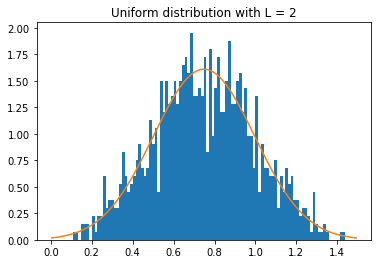

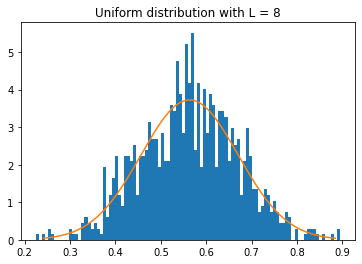

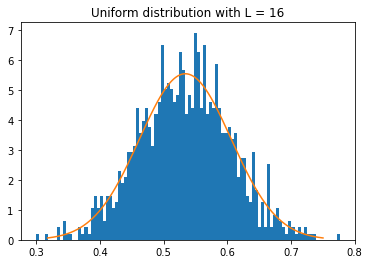

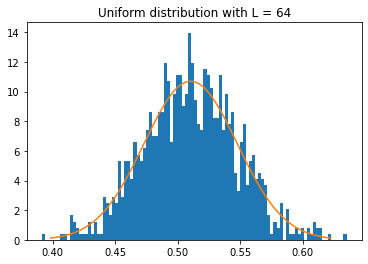

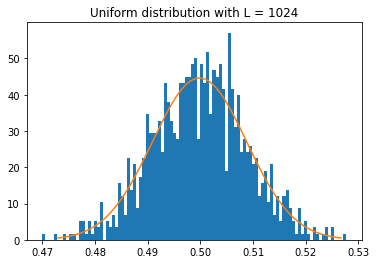

In [44]:
#letra a

L_list = [2,8,16,64,1024]
for L in L_list:
    z_inter_list =  np.random.uniform(0,1,1000)
    for i in range(0,L):
        z_new_list = np.random.uniform(0,1,1000)
        z_inter_list = z_inter_list + z_new_list
    
    z_list = []
    for i in range(len(z_inter_list)):
        z_list.append(z_inter_list[i]/L)
        
    
    z_mean = np.sum(z_list)/len(z_list)
    z_var = np.sum((z_list - z_mean)**2)/len(z_list)
    
    
    x_list = np.linspace(z_mean - 3*np.sqrt(z_var),z_mean + 3*np.sqrt(z_var),1000)
    plt.hist(z_list,density = True,bins = 100)
    plt.plot(x_list,stats.norm.pdf(x_list,z_mean,np.sqrt(z_var)))
    plt.title('Uniform distribution with L = ' + str(L))
    plt.show()
    
    

0.5082205506103611


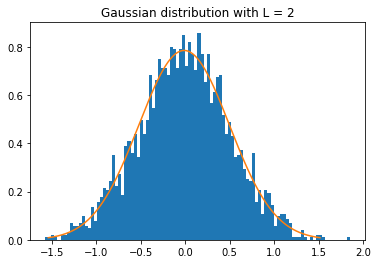

0.12433168708905


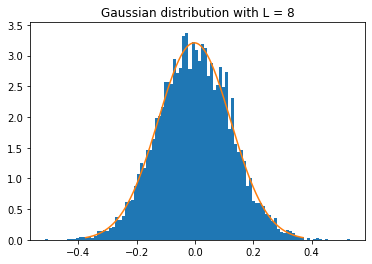

0.06257305865172522


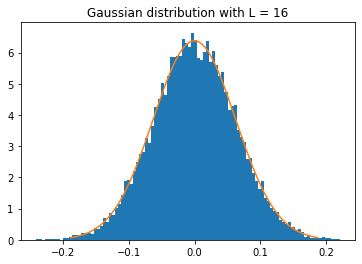

0.01567063532884563


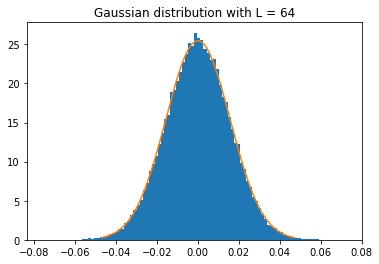

In [48]:
#letra b

L_list = [2,8,16,64]
for L in L_list:
    sampler_gaussiano = tarefa1.sampler(pairs_gauss)
    gaussian_sample = sampler_gaussiano.sample(1000)
    z_inter_list =  gaussian_sample
    for i in range(0,L):
        z_new_list = sampler_gaussiano.sample(1000)
        z_inter_list = z_inter_list + z_new_list
    
    z_list = []
    for i in range(len(z_inter_list)):
        z_list.append(z_inter_list[i]/L)
        
    
    z_mean = np.sum(z_list)/len(z_list)
    z_var = np.sum((z_list - z_mean)**2)/len(z_list)
    
    
    x_list = np.linspace(z_mean - 3*np.sqrt(z_var),z_mean + 3*np.sqrt(z_var),1000)
    plt.hist(z_list,density = True,bins = 100)
    plt.plot(x_list,stats.norm.pdf(x_list,z_mean,np.sqrt(z_var)))
    plt.title('Gaussian distribution with L = ' + str(L))
    plt.show()

1000


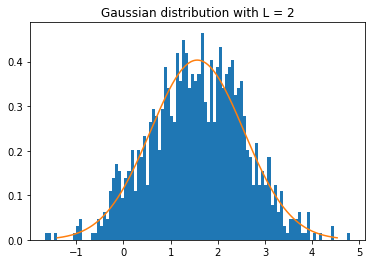

1000


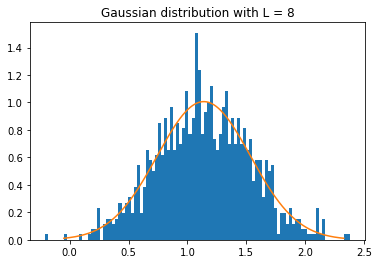

1000


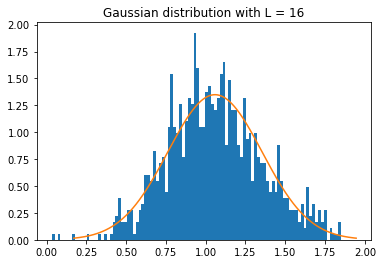

1000


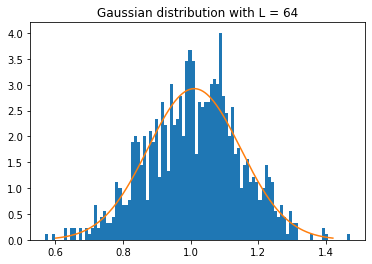

1000


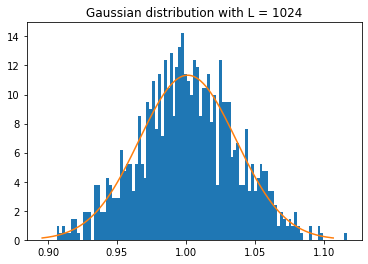

In [4]:
#letra c

L_list = [2,8,16,64,1024]
for L in L_list:
    gaussian_sample_1 = np.random.normal(0,1,1000)
    gaussian_sample_2 = np.random.normal(2,2,1000)
    z_inter_list =  gaussian_sample_1+gaussian_sample_2
    for i in range(0,L):
        z_new_list = np.random.normal(0,1,1000) + np.random.normal(2,2,1000)
        z_inter_list = z_inter_list + z_new_list
    
    z_list = []
    for i in range(len(z_inter_list)):
        z_list.append(z_inter_list[i]/(2*L))
        
    
    z_mean = np.sum(z_list)/len(z_list)
    z_var = np.sum((z_list - z_mean)**2)/len(z_list)
    
    x_list = np.linspace(z_mean - 3*np.sqrt(z_var),z_mean + 3*np.sqrt(z_var),1000)
    plt.hist(z_list,density = True,bins = 100)
    plt.plot(x_list,stats.norm.pdf(x_list,z_mean,np.sqrt(z_var)))
    plt.title('Gaussian distribution with L = ' + str(L))
    plt.show()